In [16]:
DATASET = 'bdsaglam/triviaqa-wiki-musique-mini'

## Inspect

In [17]:
import json
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [18]:
EXP_DIR = Path("./exps")
df = pd.DataFrame([json.loads(fp.read_text()) for fp in EXP_DIR.glob("*.json")])
df = df[df['params.dataset.path'] == DATASET].reset_index(drop=True)
len(df)

20

In [19]:
df['params.model.path'].unique()

array(['meta-llama/Llama-3.1-8B-Instruct', 'Qwen/Qwen2.5-7B-Instruct',
       'Qwen/Qwen2.5-14B-Instruct',
       'bdsaglam/Llama-3.1-8B-Instruct-ragent-grpo-musique-merged',
       'bdsaglam/Llama-3.1-8B-Instruct-ragent-grpo-20250520_080809-merged'],
      dtype=object)

In [20]:
def preprocess_model_name(name):
    return name.replace("-Instruct", "")

df['params.model.name'] = df['params.model.path'].map(preprocess_model_name)

In [21]:
df['params.fine_tuning'] = df['params.model.name'].map(lambda x: 'GRPO' if 'ragent' in x else 'None')
df['params.model.base'] = df['params.model.name'].map(lambda x: x.rsplit('-ragent')[0])
# extract the model size from the model name, e.g. Qwen/Qwen2.5-1.5B-Instruct -> 1.5B
df['params.model.size'] = df['params.model.name'].str.extract(r'-([0-9.]+)B').map(float)

In [36]:
target_params = [
    "params.dataset.path",
    "params.model.name",
    "params.model.size",
    "params.model.temperature",
    "params.model.few_shot_prob",
    "params.fine_tuning",
    "params.repeat",
    # "params.retriever.name",
    # "params.retriever.top_n",
]

In [37]:
df.columns

Index(['commit', 'id', 'name', 'params.agent', 'params.dataset.path',
       'params.dataset.name', 'params.dataset.split', 'params.model.path',
       'params.model.temperature', 'params.model.top_p',
       'params.model.few_shot_prob', 'params.retriever.name',
       'params.retriever.top_n', 'params.repeat', 'params.run',
       'params.devices', 'metrics.exact_match', 'metrics.f1',
       'metrics.supporting.precision', 'metrics.supporting.recall',
       'metrics.supporting.f1', 'metrics.citation.precision',
       'metrics.citation.recall', 'metrics.citation.f1', 'params.model.name',
       'params.fine_tuning', 'params.model.base', 'params.model.size'],
      dtype='object')

In [38]:
leaderboard_df = df[
    [
        "name",
        *target_params,
        "metrics.exact_match",
        "metrics.f1",
        "metrics.supporting.f1",
        "metrics.supporting.recall",
        "metrics.supporting.precision",
        "metrics.citation.f1",
        "metrics.citation.recall",
        "metrics.citation.precision",
    ]
].sort_values(by="metrics.f1", ascending=False)

leaderboard_df

,name,params.dataset.path,params.model.name,params.model.size,params.model.temperature,params.model.few_shot_prob,params.fine_tuning,params.repeat,metrics.exact_match,metrics.f1,metrics.supporting.f1,metrics.supporting.recall,metrics.supporting.precision,metrics.citation.f1,metrics.citation.recall,metrics.citation.precision
6,quare-dent,bdsaglam/triviaqa-wiki-musique-mini,bdsaglam/Llama-3.1-8B-ragent-grpo-musique-merged,8.0,0.5,1.0,GRPO,1,0.453333,0.507192,0.0,0.0,0.0,0.005333,0.002895,0.040000
7,white-rand,bdsaglam/triviaqa-wiki-musique-mini,bdsaglam/Llama-3.1-8B-ragent-grpo-musique-merged,8.0,0.0,1.0,GRPO,1,0.373333,0.420312,0.0,0.0,0.0,0.000803,0.000429,0.006667
10,slung-ziti,bdsaglam/triviaqa-wiki-musique-mini,bdsaglam/Llama-3.1-8B-ragent-grpo-musique-merged,8.0,0.5,0.0,GRPO,1,0.303333,0.389754,0.0,0.0,0.0,0.027345,0.016703,0.113333
2,mousy-eric,bdsaglam/triviaqa-wiki-musique-mini,Qwen/Qwen2.5-14B,14.0,0.5,1.0,None,1,0.310000,0.388893,0.0,0.0,0.0,0.015845,0.015152,0.020000
18,ceric-ions,bdsaglam/triviaqa-wiki-musique-mini,bdsaglam/Llama-3.1-8B-ragent-grpo-musique-merged,8.0,0.0,0.0,GRPO,1,0.310000,0.370051,0.0,0.0,0.0,0.015452,0.009177,0.083333
14,ohmic-morn,bdsaglam/triviaqa-wiki-musique-mini,Qwen/Qwen2.5-14B,14.0,0.0,1.0,None,1,0.250000,0.343502,0.0,0.0,0.0,0.010444,0.010238,0.013333
12,veiny-gaby,bdsaglam/triviaqa-wiki-musique-mini,Qwen/Qwen2.5-7B,7.0,0.5,1.0,None,1,0.220000,0.322476,0.0,0.0,0.0,0.066440,0.048489,0.163333
11,front-says,bdsaglam/triviaqa-wiki-musique-mini,Qwen/Qwen2.5-7B,7.0,0.0,1.0,None,1,0.190000,0.306487,0.0,0.0,0.0,0.069939,0.051344,0.196667
16,adunc-love,bdsaglam/triviaqa-wiki-musique-mini,Qwen/Qwen2.5-14B,14.0,0.0,0.0,None,1,0.193333,0.285424,0.0,0.0,0.0,0.000000,0.000000,0.000000
3,blown-flus,bdsaglam/triviaqa-wiki-musique-mini,Qwen/Qwen2.5-14B,14.0,0.5,0.0,None,1,0.183333,0.277133,0.0,0.0,0.0,0.000000,0.000000,0.000000


In [35]:
def scatter_plot(df):
    # Create publication-quality plot comparing model size vs F1 score
    plt.style.use("seaborn-v0_8")  # Use the updated seaborn style name
    plt.figure(figsize=(12, 6))

    # Customize appearance
    plt.grid(True, linestyle="--", alpha=0.7)
    plt.xlabel("Model Size (Billion Parameters)", fontsize=12)
    plt.ylabel("F1 Score", fontsize=12)
    plt.title("Model Performance vs Size", fontsize=14, pad=15)

    # Add fine-tuning type as color
    colors = {"None": "C0", "GRPO": "C1"}
    for fine_tuning in colors:
        mask = df["params.fine_tuning"] == fine_tuning

        # Plot points
        plt.scatter(
            df[mask]["params.model.size"],
            df[mask]["metrics.f1"],
            label=fine_tuning if fine_tuning != "None" else "Base Model",
            alpha=0.7,
            s=100,
            c=colors[fine_tuning],
        )

        # Add model names as annotations
        for idx in df[mask].index:
            model_name = df.loc[idx, "params.model.base"] + "-" + df.loc[idx, "params.retriever.name"]
            plt.annotate(
                model_name,
                (df.loc[idx, "params.model.size"], df.loc[idx, "metrics.f1"]),
                xytext=(5, 5),
                textcoords="offset points",
                fontsize=8,
            )

    plt.legend(title="Fine-tuning Type", title_fontsize=10)

    # Adjust layout and style
    plt.tight_layout()
    plt.show()


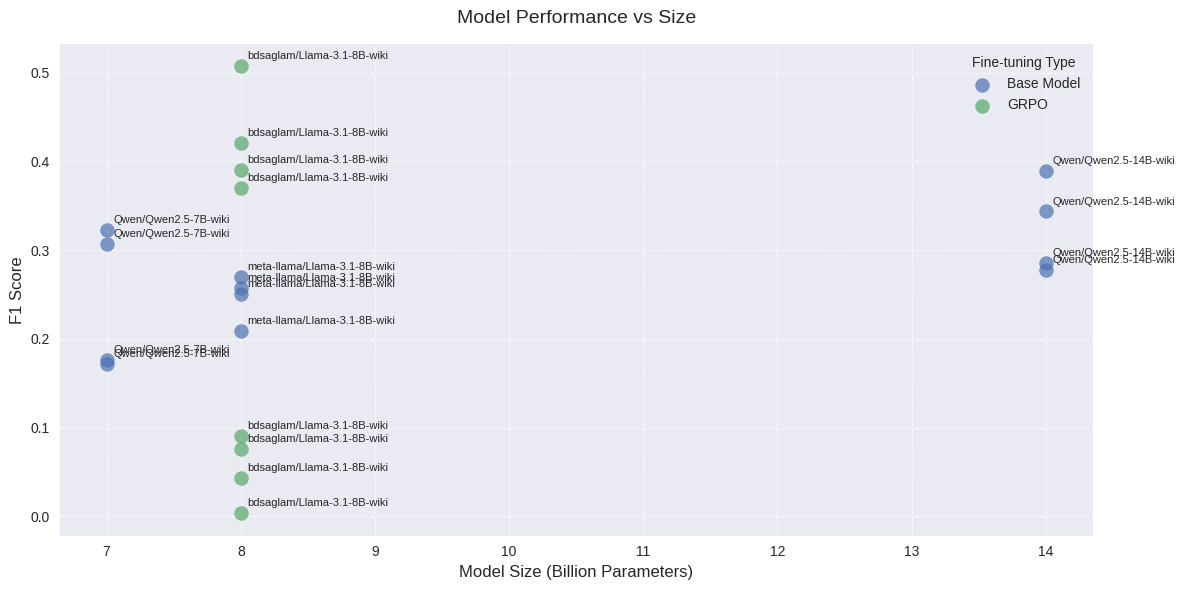

In [27]:
scatter_plot(df)

In [28]:
def plot_model_size_vs_f1(df):
    """Create a publication-quality scatter plot comparing model size vs F1 score."""
    # Set style and figure size
    plt.style.use("seaborn-v0_8-whitegrid")
    fig, ax = plt.subplots(figsize=(12, 6), dpi=300)

    # Customize appearance
    ax.grid(True, linestyle="--", alpha=0.4, zorder=0)
    ax.set_xlabel("Model Size (Billion Parameters)", fontsize=12, fontweight="bold")
    ax.set_ylabel("F1 Score", fontsize=12, fontweight="bold")
    ax.set_title("Language Model Performance by Parameter Count", fontsize=14, pad=15, fontweight="bold")

    # Set x-axis to logarithmic scale
    ax.set_xscale('log')

    # Define colors and markers
    colors = {"None": "#2E86C1", "GRPO": "#E74C3C"}
    markers = {"None": "o", "GRPO": "^"}

    for fine_tuning in ["None", "GRPO"]:
        mask = df["params.fine_tuning"] == fine_tuning
        label = "Base Model" if fine_tuning == "None" else "GRPO Fine-tuned"

        # Plot points
        ax.scatter(
            df[mask]["params.model.size"],
            df[mask]["metrics.f1"],
            label=label,
            alpha=0.9,
            s=120,
            c=colors[fine_tuning],
            marker=markers[fine_tuning],
            edgecolor="white",
            linewidth=1,
            zorder=2,
        )

        # Add model name annotations
        for idx in df[mask].index:
            label = df.loc[idx, "params.model.base"].replace("Instruct", "").strip("-")
            label += f" (x{df.loc[idx, 'params.repeat']})"
            plt.annotate(
                label,
                (df.loc[idx, "params.model.size"], df.loc[idx, "metrics.f1"]),
                xytext=(7, 7),
                textcoords="offset points",
                fontsize=9,
                alpha=0.8,
                bbox=dict(facecolor="white", edgecolor="none", alpha=0.7, pad=1),
            )

    # Customize legend
    ax.legend(title="Model Type", title_fontsize=10, fontsize=10, framealpha=0.9, edgecolor="none", loc="upper left")

    # Set axis limits with padding
    ax.set_xlim(left=1)  # Start at 1B parameters since using log scale
    ax.set_ylim(bottom=0)

    # Format axis ticks
    ax.tick_params(axis="both", which="major", labelsize=10)

    plt.tight_layout()
    plt.show()


In [29]:
def aggregate_best_models(df, by: list[str] = ["params.model.base", "params.fine_tuning", "params.repeat"]):
    # Group by model base and fine tuning method
    grouped = df.groupby(by)

    # Get columns of interest
    columns = [
        "params.model.base",
        "params.model.size",
        "params.fine_tuning",
        "params.retriever.name",
        "params.retriever.top_n",
        "params.repeat",
        "metrics.exact_match",
        "metrics.f1",
        "metrics.supporting.recall",
        "metrics.supporting.f1",
    ]

    # For each group, select the row with highest F1 score
    return (
        grouped.apply(lambda x: x.loc[x["metrics.f1"].idxmax()])[columns]
        .reset_index(drop=True)
        .sort_values(by="metrics.f1", ascending=False)
    )

/tmp/ipykernel_2311096/137597599.py:21: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped.apply(lambda x: x.loc[x["metrics.f1"].idxmax()])[columns]


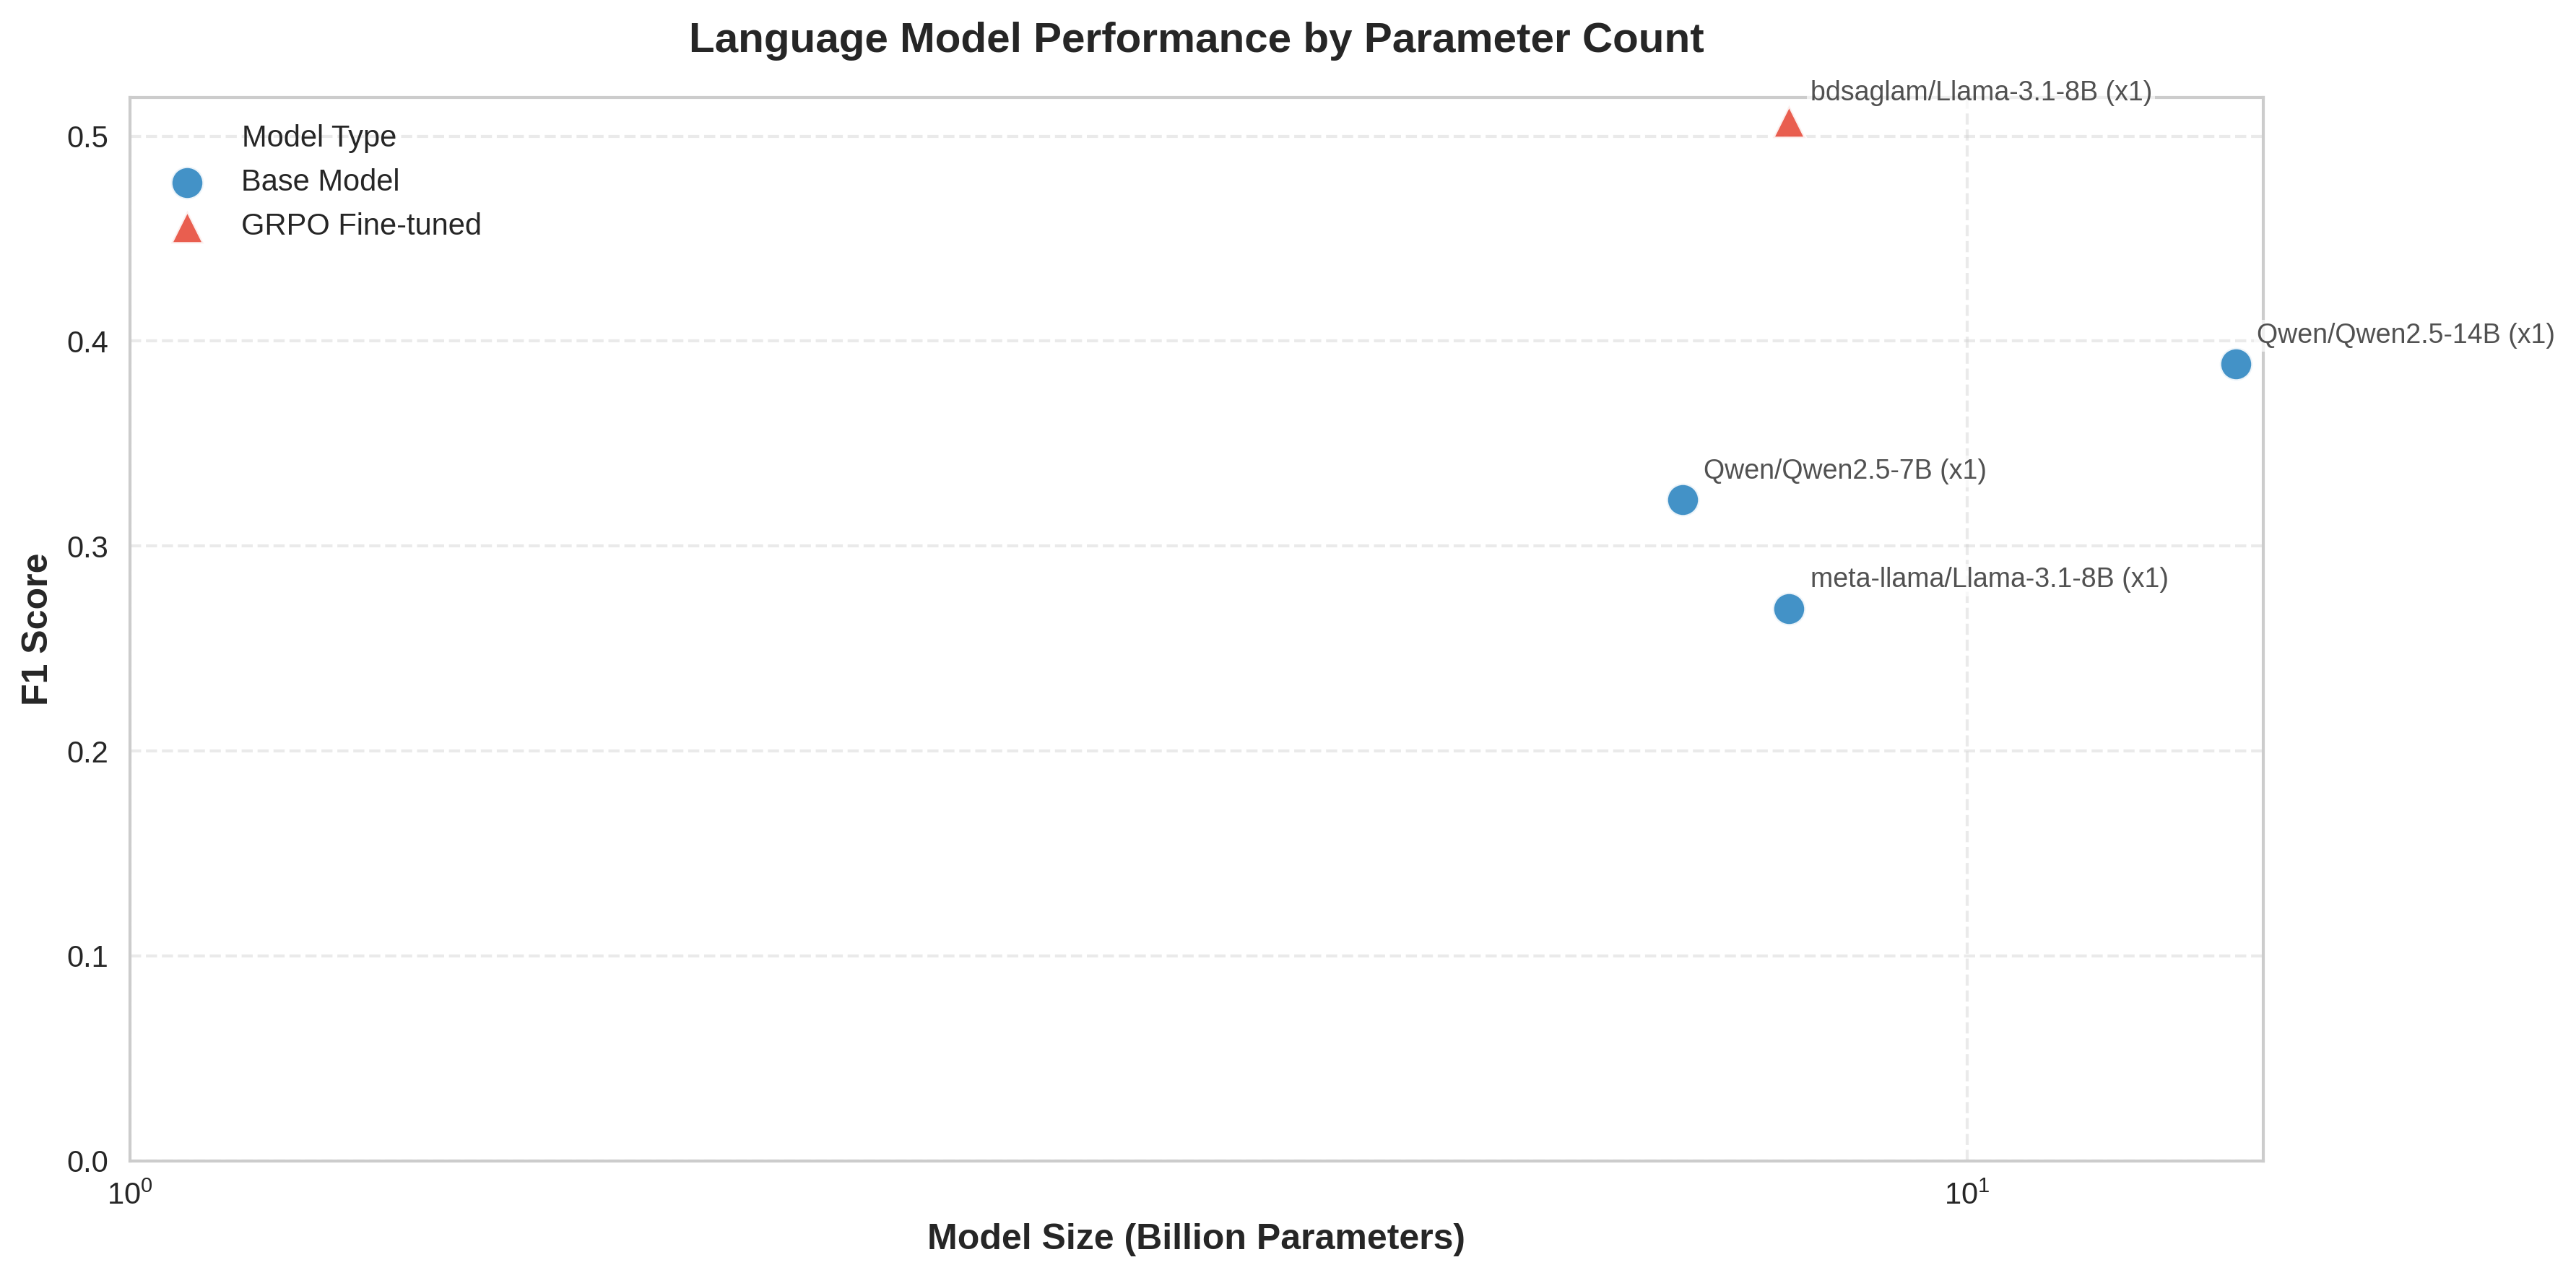

,params.model.base,params.model.size,params.fine_tuning,params.retriever.name,params.retriever.top_n,params.repeat,metrics.exact_match,metrics.f1,metrics.supporting.recall,metrics.supporting.f1
2,bdsaglam/Llama-3.1-8B,8.0,GRPO,wiki,1,1,0.453333,0.507192,0.0,0.0
0,Qwen/Qwen2.5-14B,14.0,None,wiki,1,1,0.310000,0.388893,0.0,0.0
1,Qwen/Qwen2.5-7B,7.0,None,wiki,1,1,0.220000,0.322476,0.0,0.0
3,meta-llama/Llama-3.1-8B,8.0,None,wiki,1,1,0.230000,0.269582,0.0,0.0


In [30]:
best_df = aggregate_best_models(df)
plot_model_size_vs_f1(best_df)
display(best_df)